# **Week-3 Live Session-1**

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
cdata = fetch_california_housing(as_frame = True)

In [ ]:
type(cdata)

sklearn.utils._bunch.Bunch

In [ ]:
cdata.frame.shape

(20640, 9)

In [ ]:
print(cdata.DESCR)

In [ ]:
X = cdata['data']
y = cdata['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [ ]:
import numpy as np
baseline_prediction = np.mean(y_train)

In [ ]:
baseline_prediction

2.0617410652858528

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
baseline_prediction_test = np.full_like(y_test, baseline_prediction)

In [ ]:
baseline_prediction_test.shape

(4128,)

In [ ]:
mean_squared_error(y_test, baseline_prediction_test)

1.368214167083424

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = LR.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predict)

0.5121278589024744

In [ ]:
y_predict_train = LR.predict(X_train)

In [ ]:
mean_squared_error(y_train, y_predict_train)

0.5275913909001964

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
features = cdata['data']
features

In [ ]:
poly_features = PolynomialFeatures(degree = 3)

In [ ]:
X_train_poly = poly_features.fit_transform(X_train)

In [ ]:
X_train_poly.shape

(16512, 165)

In [ ]:
X_test_poly = poly_features.transform(X_test)

In [ ]:
LR.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
train_predict = LR.predict(X_train_poly)

In [ ]:
mean_squared_error(y_train, train_predict)

0.3487455780268101

# **Week-3 Live Session-2**

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from scipy.stats import reciprocal, uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
data = fetch_california_housing(as_frame = True)

In [39]:
X = data.data
y = data.target

X.shape, y.shape

((20640, 8), (20640,))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### GRID SEARCH

In [41]:
pipe = make_pipeline(StandardScaler(), SGDRegressor())

In [42]:
param_dist = {
    'sgdregressor__alpha' : [0.00001, 0.001, 0.01],
    'sgdregressor__penalty' : ['l1', 'l2'],
    'sgdregressor__max_iter' : [1000, 2000, 3000]
}

In [43]:
grid_search = GridSearchCV(pipe, param_dist, cv = 5, scoring = 'neg_mean_squared_error')

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdregressor', SGDRegressor())]),
             param_grid={'sgdregressor__alpha': [1e-05, 0.001, 0.01],
                         'sgdregressor__max_iter': [1000, 2000, 3000],
                         'sgdregressor__penalty': ['l1', 'l2']},
             scoring='neg_mean_squared_error')

In [45]:
grid_search.best_params_

{'sgdregressor__alpha': 0.01,
 'sgdregressor__max_iter': 1000,
 'sgdregressor__penalty': 'l1'}

In [46]:
best_model = grid_search.best_estimator_

In [47]:
prediction = best_model.predict(X_test)

In [48]:
mean_squared_error(y_test, prediction)

0.5759760797215931

##### BAYESIAN SEARCH

In [49]:
from hyperopt import fmin, tpe, hp, Trials, space_eval

In [56]:
# Function

def objective(params):
  pipeline = make_pipeline(StandardScaler(), SGDRegressor(**params))
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  return mse

In [51]:
# Parameter Space

space = {
    'alpha' : hp.uniform('alpha', 0.0001, 0.01),
    'penalty': hp.choice('penalty', ['l1','l2']),
    'max_iter': hp.choice('max_iter', [1000,2000, 3000])
}

In [57]:
trials = Trials()
best = fmin(objective, space, algo = tpe.suggest, max_evals = 10, trials = trials)

100%|██████████| 10/10 [00:00<00:00, 14.07trial/s, best loss: 0.5439445386363093]


In [58]:
best_params = space_eval(space, best)

In [59]:
best_params

{'alpha': 0.0006891080697746355, 'max_iter': 1000, 'penalty': 'l1'}

In [60]:
for i, trial in enumerate(trials):
  print(trial)

{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.546870230033805, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'alpha': [0], 'max_iter': [0], 'penalty': [0]}, 'vals': {'alpha': [0.0002348630694031123], 'max_iter': [2], 'penalty': [0]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2023, 7, 20, 14, 39, 5, 263000), 'refresh_time': datetime.datetime(2023, 7, 20, 14, 39, 5, 330000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.5439445386363093, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'alpha': [1], 'max_iter': [1], 'penalty': [1]}, 'vals': {'alpha': [0.0006891080697746355], 'max_iter': [0], 'penalty': [0]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2023, 7, 20, 14, 39, 5, 333000), 'refresh_time': datetime.datetime(2023, 7, 20, 14, 39, 5, 373000)}
{'state': 2, 'tid': 2

##### SHAP -> FEATURE IMPORTANCE

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
LR = LinearRegression()

In [64]:
LR.fit(X_train, y_train)

LinearRegression()

In [65]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [66]:
explainer = shap.Explainer(LR.predict, X_test)

In [67]:
shap_values = explainer(X_test)

Exact explainer: 4129it [00:49, 73.92it/s]                           


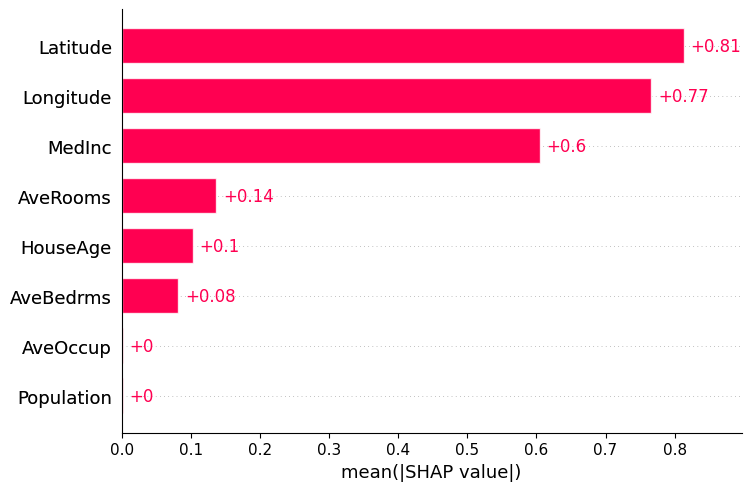

In [68]:
# Feature Importance

shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


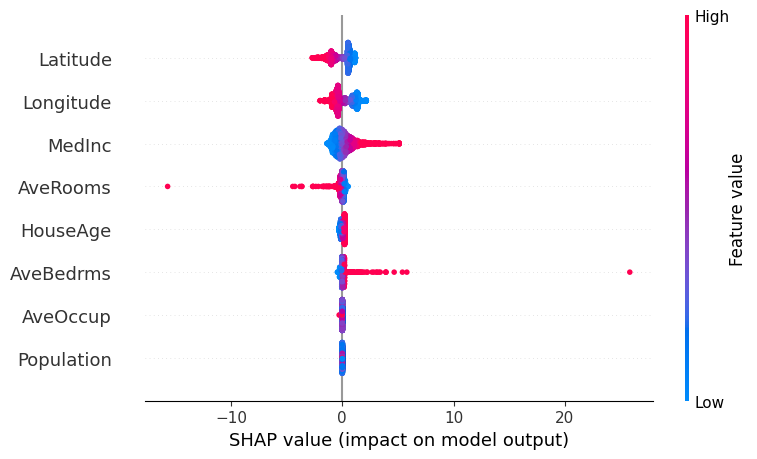

In [69]:
shap.summary_plot(shap_values)

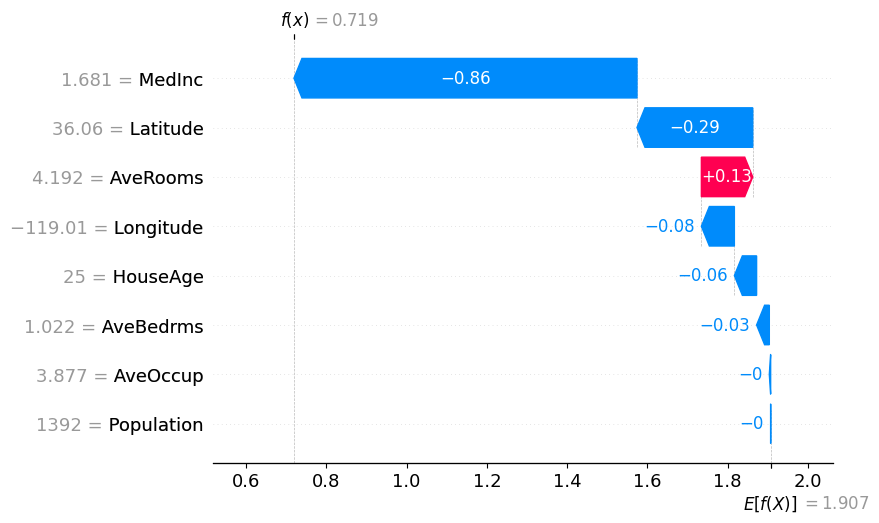

In [70]:
shap.plots.waterfall(shap_values[0])

##### MNIST DATASET

In [71]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version = 1, cache = True)

In [73]:
X = mnist.data
y = mnist.target

In [74]:
X.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
y.head(2)

0    5
1    0
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [84]:
logR = LogisticRegression(max_iter = 100)

In [88]:
logR.fit(Xtrain, ytrain)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
y_pred = logR.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest, y_pred)

In [ ]:
mis_classified_indices = np.where(y_test != y_pred)[0]

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))

for i, index in enumerate(mis_classified_indices[:5]):
  image = X_test.iloc[index].values.reshape(28,28)
  true_label = y_test.iloc[index]
  predicted_label = y_pred[index]
  plt.subplot(1,5, i+1)
  plt.imshow(image, cmap = 'gray')
  plt.title( predicted_label)
  plt.axis('off')

plt.tight_layout()
plt.show()